# Digital Signal Processing

### MsCV - ViBOT - MAIA

The reasons to convert signals into frequency domain is to get the idea of different frequency components it is composed of. This might help to detect the required signals and classify them, for examples, speak or speech recognition from a sound wave, noise removal from the image, or finding recurring patterns within images. 

In [1]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm
from scipy.stats import norm
from scipy import signal


Pretty printing has been turned OFF


# Discrete Fourier Transform
The Discrete Fourier Transform (DFT) converts discrete data from a time domain into frequency domain. The DFT analyzes the finite segment in one period of an infinitely extended periodic signal, which is defined as: 
$$ X[n] = \sum^{N-1}_{k = 0} x[k] e^{-j(2\pi/N)kn}$$


Note: The Fast Fourier Transform (FFT) is simply an algorithm to compute the DFT in a faster way!

## Exercise 1 -  ** DFT** 
**1.1** The DFT of a $5$ Hz sin wave sampled with the sampling of $f_s = 50$ Hz over 1000 (N = 1000) samples is computed as follows:


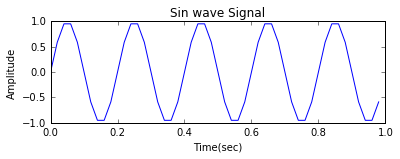

/home/masters/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


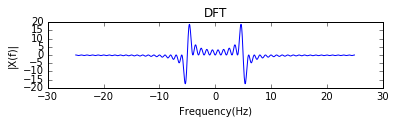

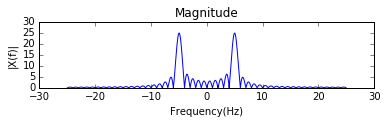

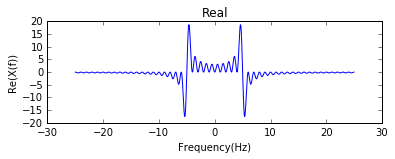

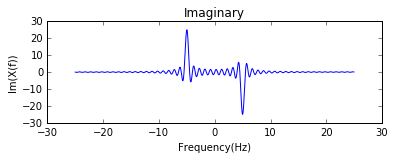

In [2]:
# Signal frequency and sampling frequency
f = 5.
fs = 50.
# time vector for one second
t = np.arange(0, 1., 1./fs)
# sin wave 
x_n = np.sin(2*np.pi*f*t)
# Number of samples 
N = 1000
# frequency vector
fr = (np.arange(-N/2,N/2,1)) * fs/N
# DFT 
# Using fftshift to have the center frequency 
x_f = np.fft.fftshift(np.fft.fft(x_n, N))
#x_f = x_f[0:N/2]

plt.figure
plt.subplot(211)
plt.plot(t, x_n)
plt.title('Sin wave Signal')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.subplot(312)
plt.plot(fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(x_f))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(x_f))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()

plt.subplot(212)
plt.plot(fr, np.imag(x_f))
plt.title('Imaginary')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Im(X(f))')
plt.show()


**1.2** Compute the DFT of a cosine wave, how that differs from that of a sine wave ?

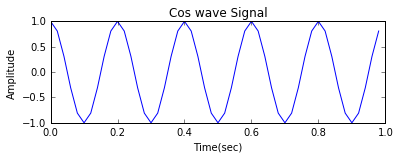

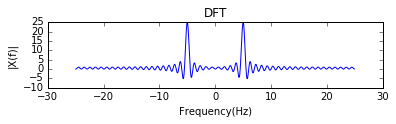

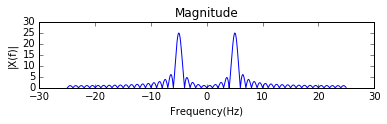

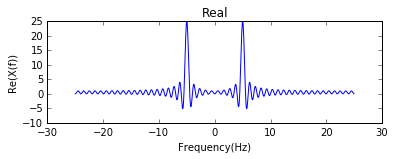

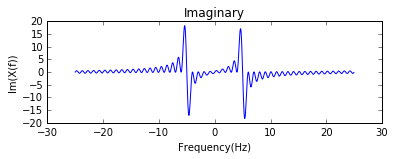

In [4]:
# Signal frequency and sampling frequency
f = 5.
fs = 50.
# time vector for one second
t = np.arange(0, 1., 1./fs)
# cos wave 
x_n = np.cos(2*np.pi*f*t)
# Number of samples 
N = 1000
# frequency vector
fr = (np.arange(-N/2,N/2,1)) * fs/N
# DFT 
# Using fftshift to have the center frequency 
x_f = np.fft.fftshift(np.fft.fft(x_n, N))
#x_f = x_f[0:N/2]

plt.figure
plt.subplot(211)
plt.plot(t, x_n)
plt.title('Cos wave Signal')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.subplot(312)
plt.plot(fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(x_f))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(x_f))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()

plt.subplot(212)
plt.plot(fr, np.imag(x_f))
plt.title('Imaginary')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Im(X(f))')
plt.show()

**1.3** Use square wave using the same frequncy and sampling frequency.

Note use `signal.square` to create your signal. 

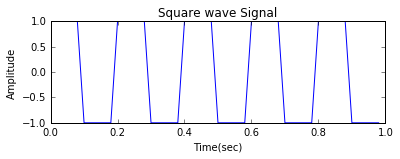

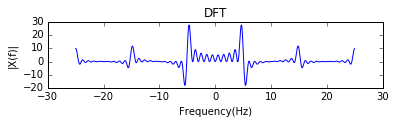

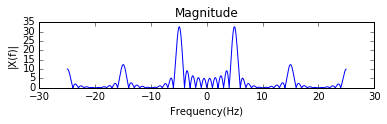

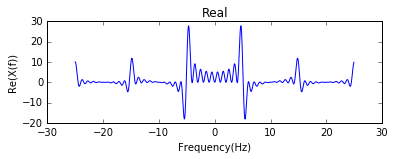

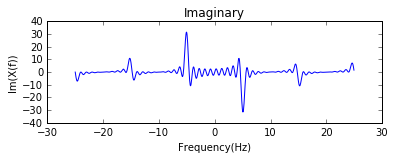

In [13]:
# Signal frequency and sampling frequency
f = 5.
fs = 50.
# time vector for one second
t = np.arange(0, 1., 1./fs)
# square wave 
#x_n = np.sin(2*np.pi*f*t)
x_n = signal.square(2 * np.pi * 5 * t)

# Number of samples 
N = 1000
# frequency vector
fr = (np.arange(-N/2,N/2,1)) * fs/N
# DFT 
# Using fftshift to have the center frequency 
x_f = np.fft.fftshift(np.fft.fft(x_n, N))
#x_f = x_f[0:N/2]

plt.figure
plt.subplot(211)
plt.plot(t, x_n)
plt.title('Square wave Signal')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.subplot(312)
plt.plot(fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(x_f))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(x_f))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()

plt.subplot(212)
plt.plot(fr, np.imag(x_f))
plt.title('Imaginary')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Im(X(f))')
plt.show()

**1.4** Use white Gaussian noise N = 10000. 

(Note use `np.random.normal` to create your noise) 

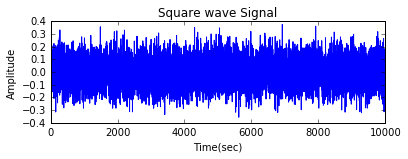

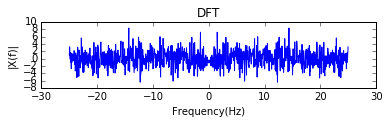

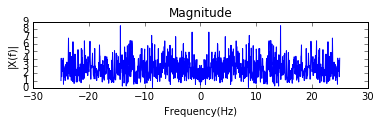

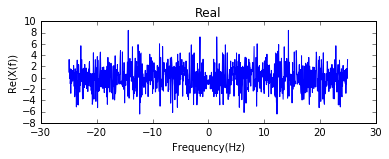

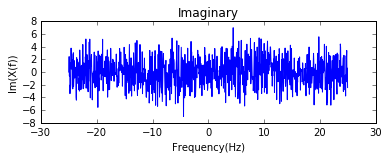

In [21]:
mu, sigma = 0, 0.1 # mean and standard deviation
x_n = np.random.normal(mu, sigma, 10000)
t = np.arange(0, 10000., 1.)
# Number of samples 
N = 1000
# frequency vector
fr = (np.arange(-N/2,N/2,1)) * fs/N
# DFT 
# Using fftshift to have the center frequency 
x_f = np.fft.fftshift(np.fft.fft(x_n, N))
#x_f = x_f[0:N/2]

plt.figure
plt.subplot(211)
plt.plot(t, x_n)
plt.title('Square wave Signal')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.subplot(312)
plt.plot(fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(x_f))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(x_f))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()

plt.subplot(212)
plt.plot(fr, np.imag(x_f))
plt.title('Imaginary')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Im(X(f))')
plt.show()

## Exercise 2 -  Sampling 

Generate and display the following signals of 1 sec duration.
$$x[n] = 3 cos(2\pi\frac{f_{1}}{f_{s}}n) + 4 sin(2\pi\frac{f_{2}}{f_{s}}n)$$
for $f_{1} = 5$ Hz and $f_{2} = 20$ Hz, sampled with the sampling frequencies of $f_{s} = [10, 20, 25, 40, 50, 100, 150]$


**2.1** Plot $x[n]$ for different sampling frequencies in time domain.

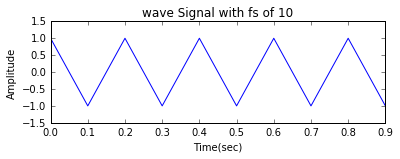

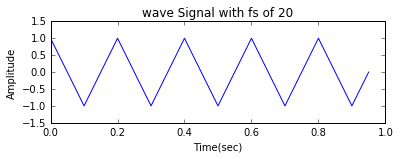

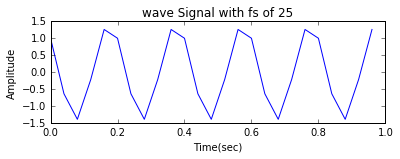

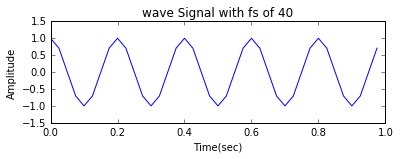

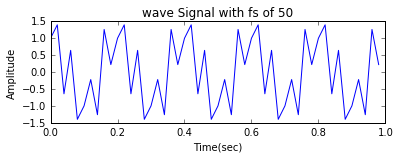

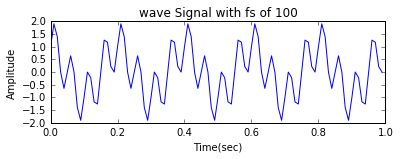

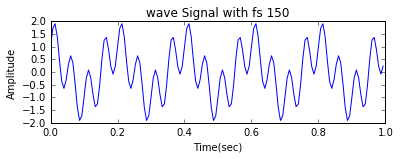

In [38]:
# Signal frequency and sampling frequency
f1 = 5.
f2 = 20.
fs = 10.
# time vector for one second
t = np.arange(0, 1., 1./fs)
# cos wave 
x_1n = np.cos(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)
plt.figure
plt.subplot(211)
plt.plot(t, x_1n)
plt.title('wave Signal with fs of 10')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

# Signal frequency and sampling frequency
f1 = 5.
f2 = 20.
fs = 20.
# time vector for one second
t = np.arange(0, 1., 1./fs)
# cos wave 
x_2n = np.cos(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)
plt.figure
plt.subplot(211)
plt.plot(t, x_2n)
plt.title('wave Signal with fs of 20')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

# Signal frequency and sampling frequency
f1 = 5.
f2 = 20.
fs = 25.
# time vector for one second
t = np.arange(0, 1., 1./fs)
# cos wave 
x_3n = np.cos(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)
plt.figure
plt.subplot(211)
plt.plot(t, x_3n)
plt.title('wave Signal with fs of 25')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

# Signal frequency and sampling frequency
f1 = 5.
f2 = 20.
fs = 40.
# time vector for one second
t = np.arange(0, 1., 1./fs)
# cos wave 
x_4n = np.cos(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)
plt.figure
plt.subplot(211)
plt.plot(t, x_4n)
plt.title('wave Signal with fs of 40')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

# Signal frequency and sampling frequency
f1 = 5.
f2 = 20.
fs = 50.
# time vector for one second
t = np.arange(0, 1., 1./fs)
# cos wave 
x_5n = np.cos(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)
plt.figure
plt.subplot(211)
plt.plot(t, x_5n)
plt.title('wave Signal with fs of 50')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

# Signal frequency and sampling frequency
f1 = 5.
f2 = 20.
fs = 100.
# time vector for one second
t = np.arange(0, 1., 1./fs)
# cos wave 
x_6n = np.cos(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)
plt.figure
plt.subplot(211)
plt.plot(t, x_6n)
plt.title('wave Signal with fs of 100')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

# Signal frequency and sampling frequency
f1 = 5.
f2 = 20.
fs = 150.
# time vector for one second
t = np.arange(0, 1., 1./fs)
# cos wave 
x_7n = np.cos(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)
plt.figure
plt.subplot(211)
plt.plot(t, x_7n)
plt.title('wave Signal with fs 150')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

**2.2.** Discuss the aliasing effects in the time domain:

**2.3** Compute the FFT of the above signals and display their centered frequency components.
Discuss your observations.

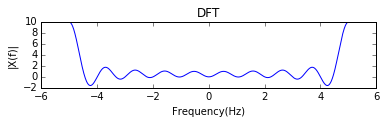

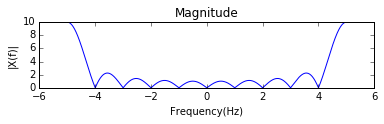

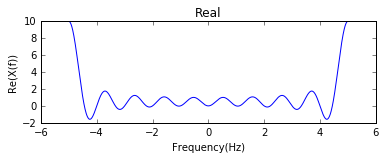

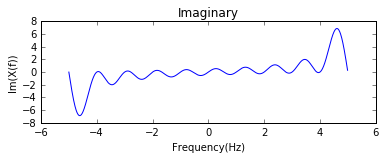

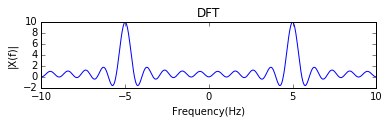

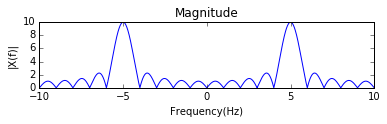

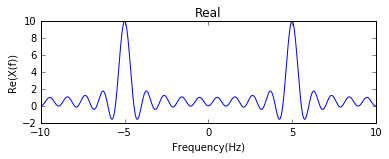

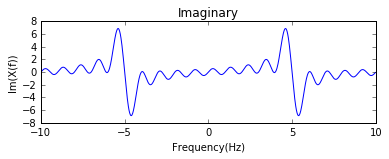

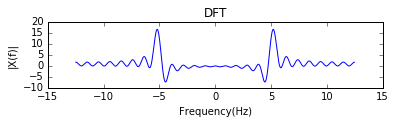

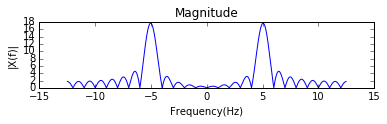

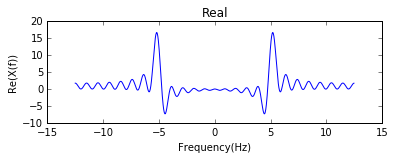

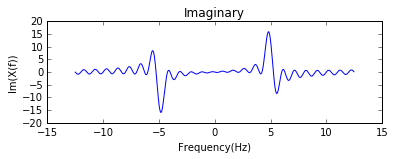

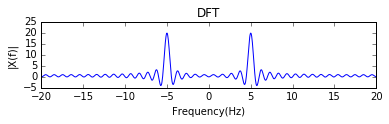

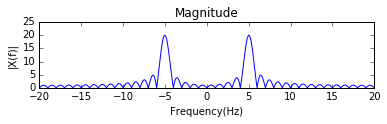

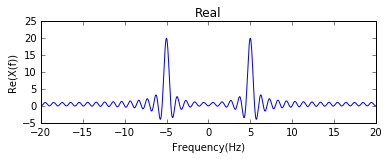

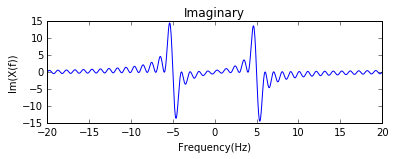

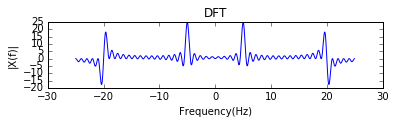

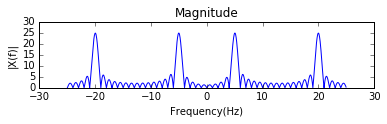

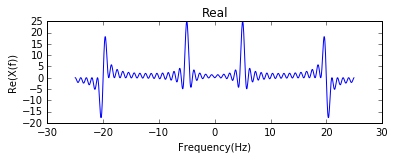

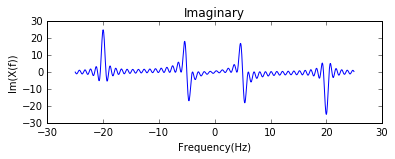

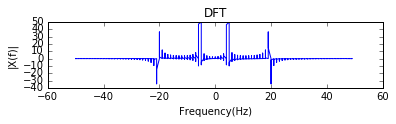

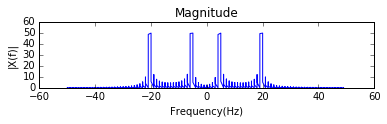

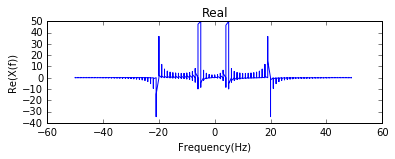

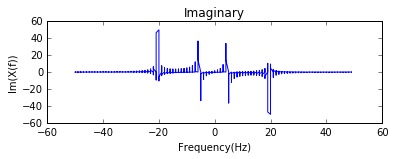

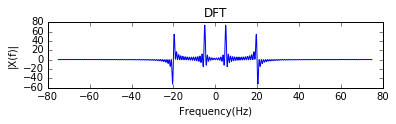

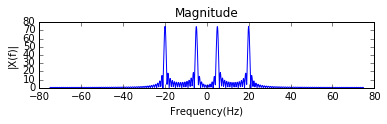

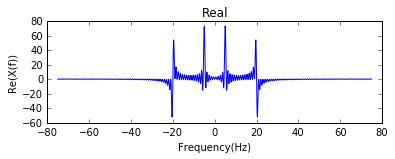

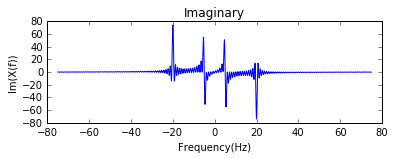

In [39]:
#As I increase the sampling frequency, the aliasing effects decrease.
#WHen the sampling frequency approach to 50Hz, the signal become to be similar to the original one.

#fs = 10
fs = 10.
N = 1000
# frequency vector
fr = (np.arange(-N/2,N/2,1)) * fs/N
# DFT 
# Using fftshift to have the center frequency 
x_f = np.fft.fftshift(np.fft.fft(x_1n, N))
#x_f = x_f[0:N/2]

plt.subplot(312)
plt.plot(fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(x_f))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(x_f))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()

plt.subplot(212)
plt.plot(fr, np.imag(x_f))
plt.title('Imaginary')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Im(X(f))')
plt.show()

#fs = 20
fs = 20.
N = 1000
# frequency vector
fr = (np.arange(-N/2,N/2,1)) * fs/N
# DFT 
# Using fftshift to have the center frequency 
x_f = np.fft.fftshift(np.fft.fft(x_2n, N))
#x_f = x_f[0:N/2]

plt.subplot(312)
plt.plot(fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(x_f))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(x_f))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()

plt.subplot(212)
plt.plot(fr, np.imag(x_f))
plt.title('Imaginary')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Im(X(f))')
plt.show()

#fs = 25
fs = 25.
N = 1000
# frequency vector
fr = (np.arange(-N/2,N/2,1)) * fs/N
# DFT 
# Using fftshift to have the center frequency 
x_f = np.fft.fftshift(np.fft.fft(x_3n, N))
#x_f = x_f[0:N/2]

plt.subplot(312)
plt.plot(fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(x_f))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(x_f))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()

plt.subplot(212)
plt.plot(fr, np.imag(x_f))
plt.title('Imaginary')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Im(X(f))')
plt.show()

#fs = 40
fs = 40.
N = 1000
# frequency vector
fr = (np.arange(-N/2,N/2,1)) * fs/N
# DFT 
# Using fftshift to have the center frequency 
x_f = np.fft.fftshift(np.fft.fft(x_4n, N))
#x_f = x_f[0:N/2]

plt.subplot(312)
plt.plot(fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(x_f))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(x_f))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()

plt.subplot(212)
plt.plot(fr, np.imag(x_f))
plt.title('Imaginary')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Im(X(f))')
plt.show()

#fs = 50
fs = 50.
N = 1000
# frequency vector
fr = (np.arange(-N/2,N/2,1)) * fs/N
# DFT 
# Using fftshift to have the center frequency 
x_f = np.fft.fftshift(np.fft.fft(x_5n, N))
#x_f = x_f[0:N/2]

plt.subplot(312)
plt.plot(fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(x_f))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(x_f))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()

plt.subplot(212)
plt.plot(fr, np.imag(x_f))
plt.title('Imaginary')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Im(X(f))')
plt.show()

#fs = 100
fs = 100
N = 1000
# frequency vector
fr = (np.arange(-N/2,N/2,1)) * fs/N
# DFT 
# Using fftshift to have the center frequency 
x_f = np.fft.fftshift(np.fft.fft(x_6n, N))
#x_f = x_f[0:N/2]

plt.subplot(312)
plt.plot(fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(x_f))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(x_f))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()

plt.subplot(212)
plt.plot(fr, np.imag(x_f))
plt.title('Imaginary')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Im(X(f))')
plt.show()

#fs = 20
fs = 150.
N = 1000
# frequency vector
fr = (np.arange(-N/2,N/2,1)) * fs/N
# DFT 
# Using fftshift to have the center frequency 
x_f = np.fft.fftshift(np.fft.fft(x_7n, N))
#x_f = x_f[0:N/2]

plt.subplot(312)
plt.plot(fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(x_f))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(x_f))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()

plt.subplot(212)
plt.plot(fr, np.imag(x_f))
plt.title('Imaginary')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Im(X(f))')
plt.show()

## Exercise 3 - 1D  DFT for image classification

1D DFT can be applied to analyze the frequency components along the one dimensional profile of an image. Here we want to use these information to classify the images into two different classes (**barcode** and **non-barcode** classes)
To do so we first 
* Load the images from 1D-DFT folder
    * **3.1** you have to normalize and resize the images to the smallest size 
    * **3.2** Take 1D profile as shown in the example and compute its DFT.
![](profile1.png)
    
    * **3.3** Separate the images to two different groups of **barcode** and **non-barcode** based on their frequency spectrum of their profile 
* Some information regarding the images:
    * There are 54 images while Images [1, 2, 6, 44:54] are barcode images and the others are similar patterns.
    
**3.4** Discuss your results

In [32]:
Path = '../images/1D-DFT/'
import os, os.path
from skimage import color
from scipy import misc
from skimage import transform
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm
from scipy.stats import norm
from scipy import signal

filenames = sorted([f for f in os.listdir(Path)])
barcode = ['barcode']
non_barcode = ['non_barcode']
         

for f in filenames:
        Img = io.imread(os.path.join(Path,f))
        Img = np.array(Img)
        Img = color.rgb2gray(Img)
        Img = img_as_float(Img)
        Img = Img/(Img.max()/255.0)#Normalize the picture
        Img = transform.resize(Img,(130,60))#Resize the picture
        Profile = Img[80,:]
        x_f = np.fft.fftshift(np.fft.fft(Profile))
        x_f = x_f[30:60]#Half of the spectrum
        x_f = np.abs(x_f)#Absolute value of spectrum
        
        #plt.figure()
        #plt.plot(x_f)
        #plt.title('Magnitude')
        #plt.xlabel('Frequency(Hz)')
        #plt.ylabel('|X(f)|')
        #plt.show()
        
        
        x_f = np.abs(x_f[1:30])
        x_sum = np.sum(x_f)#I sum up the energy of the spectrum
        #After a few times of trial, I set the thresold as 11000
        if x_sum > 11000:

            barcode.append(f)
            
        else:

            non_barcode.append(f)
    
print('Images classified as barcode:'+ str(barcode))
print('Images classified as non barcode:'+ str(non_barcode))

    
    

Pretty printing has been turned ON
Images classified as barcode:['barcode', 'tifImage_001.tif', 'tifImage_002.tif', 'tifImage_006.tif', 'tifImage_010.tif', 'tifImage_011.tif', 'tifImage_012.tif', 'tifImage_028.tif', 'tifImage_044.tif', 'tifImage_045.tif', 'tifImage_046.tif', 'tifImage_048.tif', 'tifImage_049.tif', 'tifImage_050.tif', 'tifImage_051.tif', 'tifImage_052.tif', 'tifImage_053.tif', 'tifImage_054.tif']
Images classified as non barcode:['non_barcode', 'tifImage_003.tif', 'tifImage_004.tif', 'tifImage_005.tif', 'tifImage_007.tif', 'tifImage_008.tif', 'tifImage_009.tif', 'tifImage_013.tif', 'tifImage_014.tif', 'tifImage_015.tif', 'tifImage_016.tif', 'tifImage_017.tif', 'tifImage_018.tif', 'tifImage_019.tif', 'tifImage_020.tif', 'tifImage_021.tif', 'tifImage_022.tif', 'tifImage_023.tif', 'tifImage_024.tif', 'tifImage_025.tif', 'tifImage_026.tif', 'tifImage_027.tif', 'tifImage_029.tif', 'tifImage_030.tif', 'tifImage_031.tif', 'tifImage_032.tif', 'tifImage_033.tif', 'tifImage_034.t

In [ ]:
#Images of tifImage_010.tif', 'tifImage_011.tif', 'tifImage_012.tif', 'tifImage_028.tif' are supposed to be non barcode images
#However in my experiment, they are classified as barcode image.